# **`K-Nearest Neighbors`**

In [37]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNC, kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
f1_values_set1 = np.random.randint(low=12, high=17,size=50)
f2_values_set1 = np.random.randint(low=20, high=25,size=50)

f1_values_set2 = np.random.randint(low=2, high=7,size=50)
f2_values_set2 = np.random.randint(low=10, high=15,size=50)

In [3]:
dummy_dataset1 = pd.DataFrame({'f1':f1_values_set1,
                           'f2':f2_values_set1})

dummy_dataset2 = pd.DataFrame({'f1':f1_values_set2,
                           'f2':f2_values_set2})

dummy_data = pd.concat([dummy_dataset1,dummy_dataset2],axis=0).reset_index(drop=True)

In [4]:
dummy_data['label'] = dummy_data['f1'].apply(lambda val: 1 if val > 7 else 0)

In [5]:
dummy_data.head()

,f1,f2,label
0,12,22,1
1,13,23,1
2,12,20,1
3,12,21,1
4,16,24,1


<AxesSubplot:xlabel='f1', ylabel='f2'>

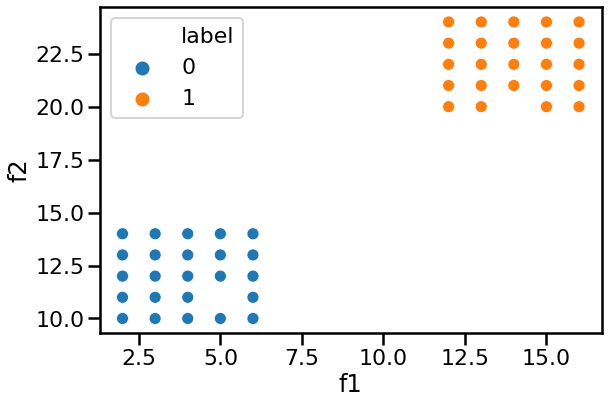

In [6]:
sns.set_context(context='poster')
plt.figure(figsize=(9,6))
sns.scatterplot(x='f1',y='f2',hue='label',data=dummy_data)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data.iloc[:,0:-1],dummy_data['label'],test_size=0.40,random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 2), (40, 2), (60,), (40,))

### **K=1**

In [9]:
knc = KNC(n_neighbors=1)

In [10]:
knc_model = knc.fit(X_train,y_train)

In [11]:
y_predict = knc.predict(X_test)

In [12]:
accuracy_score(y_test,y_predict), precision_score(y_test,y_predict), recall_score(y_test,y_predict)

(1.0, 1.0, 1.0)

### **K=1, Weighted KNN with distance metric as Canberra**

In [13]:
knc2 = KNC(n_neighbors=1, weights='distance',algorithm='ball_tree',metric=scipy.spatial.distance.canberra)

In [14]:
knc_model2 = knc2.fit(X_train,y_train)

In [15]:
y_predict2 = knc_model2.predict(X_test)

In [16]:
accuracy_score(y_test,y_predict2), precision_score(y_test,y_predict2), recall_score(y_test,y_predict2)

(1.0, 1.0, 1.0)

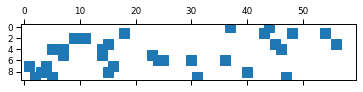

In [17]:
# pd.DataFrame(knc2.kneighbors_graph(X=X_train,n_neighbors=1,mode='connectivity').toarray())
sns.set_context('paper')
plt.spy(knc2.kneighbors_graph(X=X_train.iloc[0:10,],n_neighbors=5,mode='distance'))
plt.show()

### **KNN on Breast Cancer Dataset**

In [18]:
cancer = load_breast_cancer()

In [19]:
cancer_df = pd.concat([pd.DataFrame(cancer.data,columns=cancer.feature_names),pd.DataFrame(cancer.target,columns=['Label'])],axis=1)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


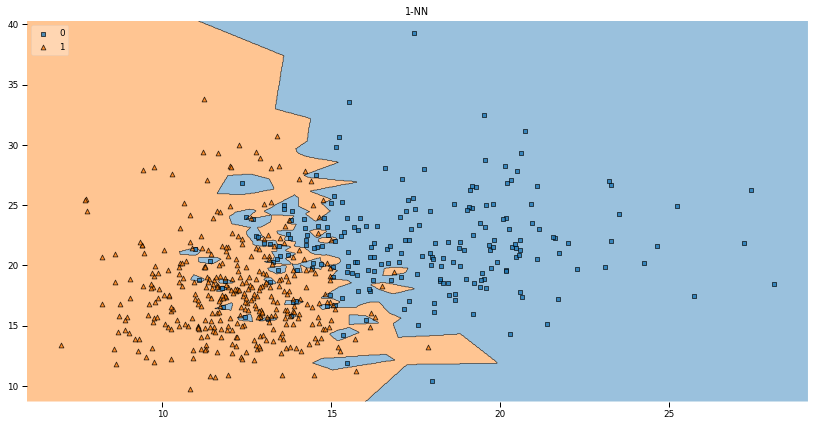

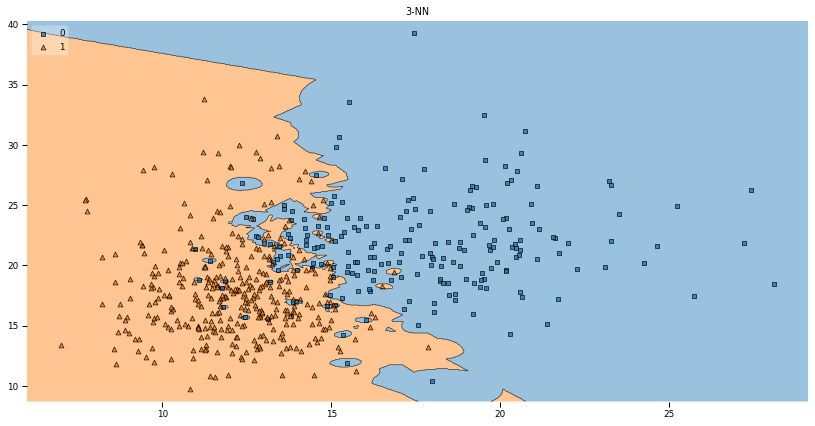

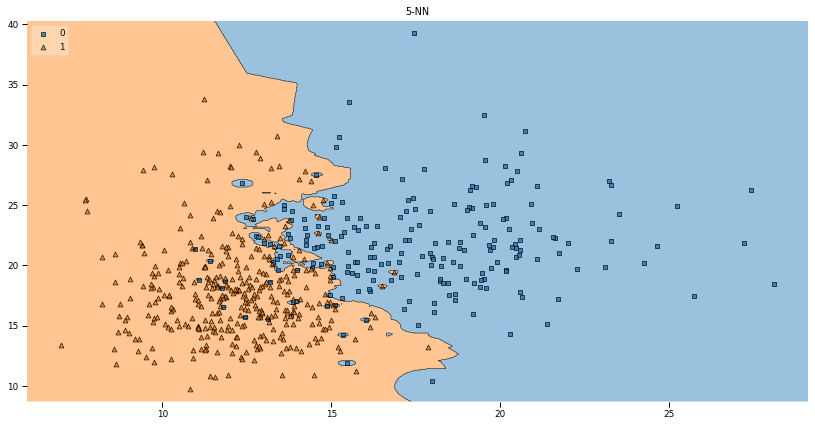

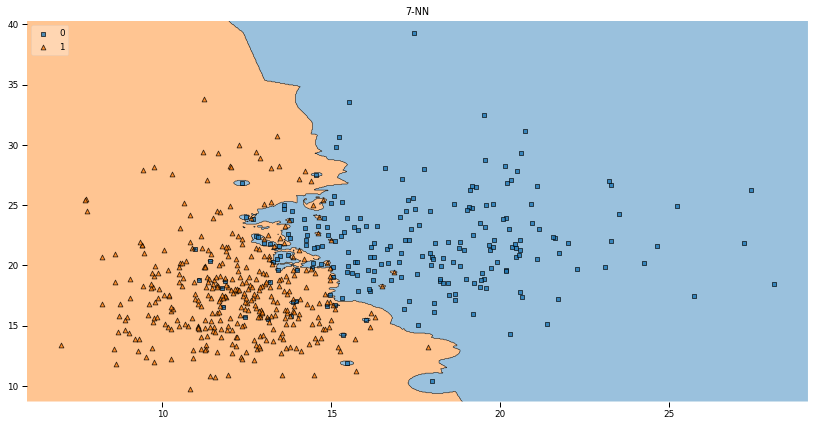

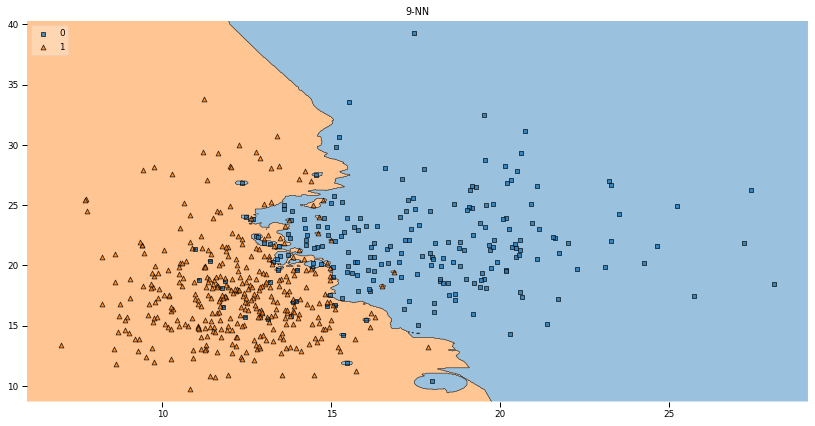

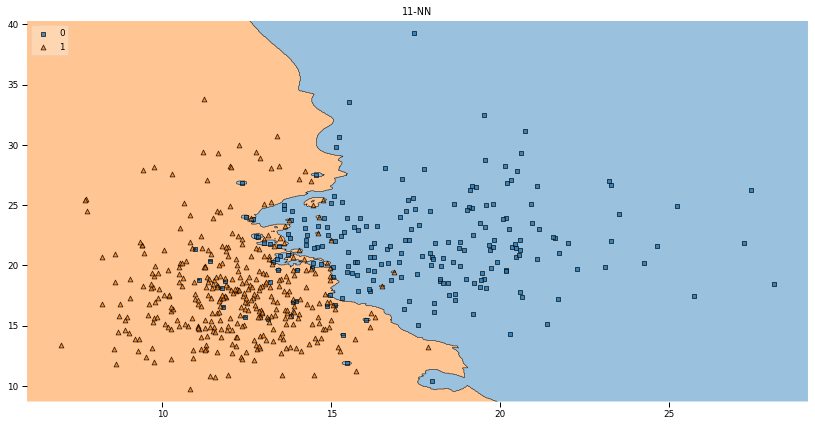

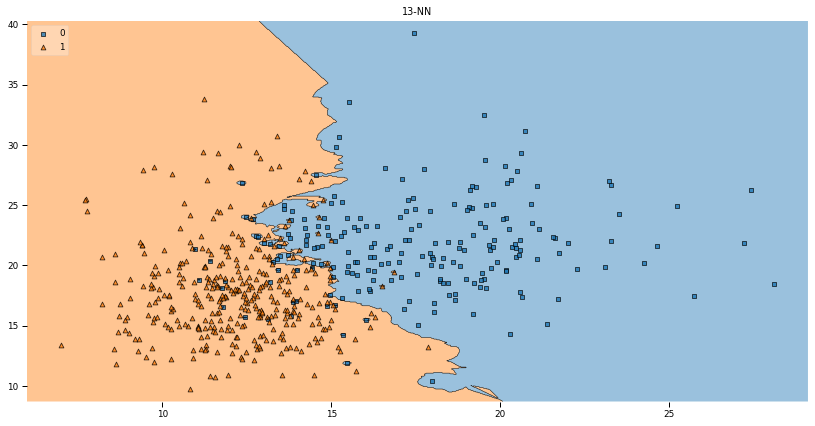

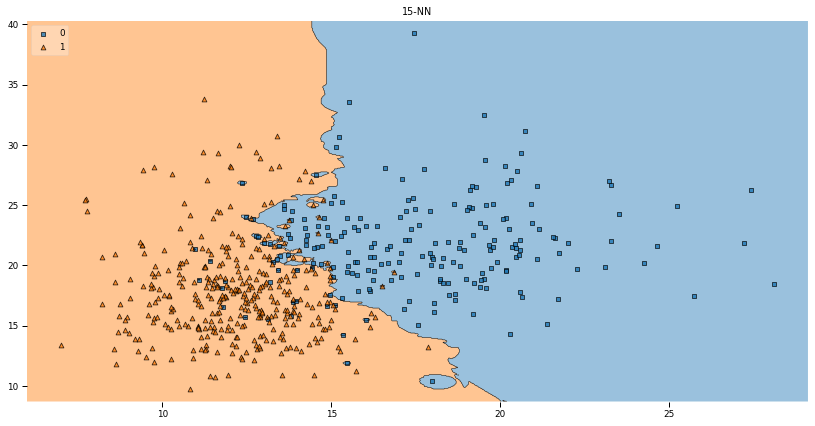

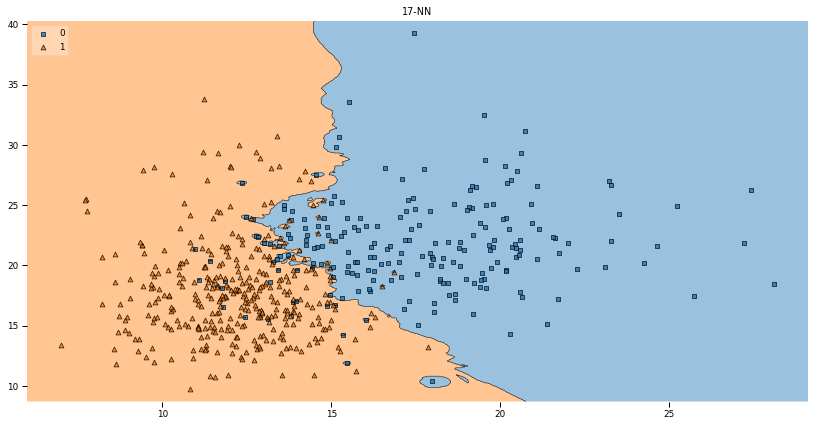

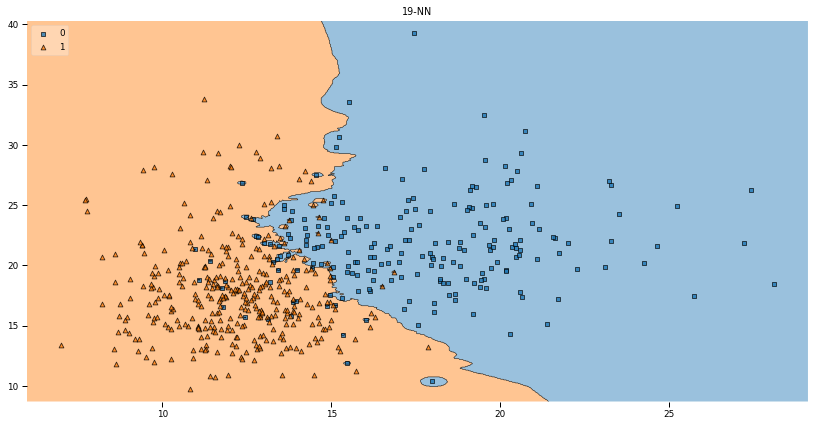

In [49]:
for k in range(1,21)[::2]:
    knn_dec_reg = KNC(n_neighbors=k,weights='distance',algorithm='kd_tree',leaf_size=40)
    knn_dec_reg.fit(cancer_df.iloc[:,0:2],y=cancer_df['Label'])
    with plt.style.context('seaborn-bright'):
        plt.figure(figsize=(14,7))
        plot_decision_regions(X=cancer_df.iloc[:,0:2].values,y=cancer_df['Label'].values,clf=knn_dec_reg,legend=2)
        plt.title("{}-NN".format(k))
        plt.show()

#### **Only TRAIN and TEST**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,0:-1],cancer_df['Label'],test_size=0.40,random_state=22)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

In [22]:
def filt(val):
    if val%2 != 0:
        return val

In [23]:
neighbors = list(filter(filt, [val for val in range(0,32)]))
neighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

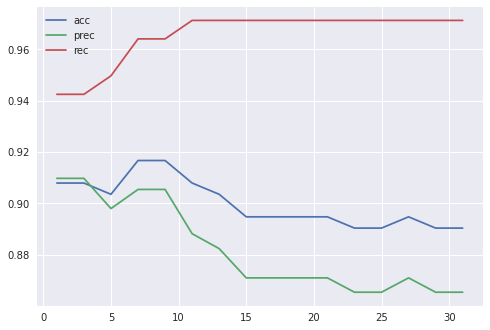

In [24]:
acc_scr = []
rec_scr = []
prec_scr = []

for neighbor in neighbors:
    knn_model = KNC(n_neighbors=neighbor)
    knn_model.fit(X_train, y_train)
    knn_y_predict = knn_model.predict(X_test)
    acc_scr.append(accuracy_score(y_test,knn_y_predict))
    rec_scr.append(recall_score(y_test,knn_y_predict))
    prec_scr.append(precision_score(y_test,knn_y_predict))
    
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr,label='acc')
    sns.lineplot(x=neighbors,y=prec_scr,label='prec')
    sns.lineplot(x=neighbors,y=rec_scr,label='rec')

#### **TRAIN, CV and TEST**

In [25]:
X1, X_test, y1, y_test = train_test_split(cancer_df.iloc[:,0:-1],cancer_df['Label'],test_size=0.30,random_state=42)

In [26]:
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size=0.30,random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_cv.shape, y_cv.shape

((278, 30), (171, 30), (278,), (171,), (120, 30), (120,))

#### **CV performance metrics**

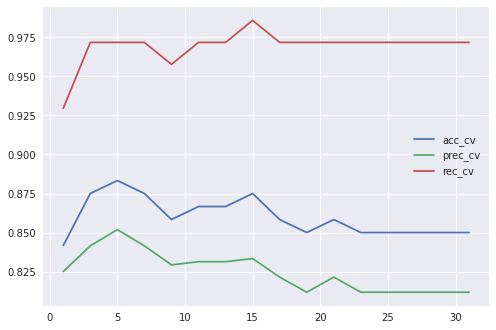

In [28]:
acc_scr_cv = []
rec_scr_cv = []
prec_scr_cv = []

for neighbor in neighbors:
    knn_model = KNC(n_neighbors=neighbor,weights='distance',algorithm='kd_tree',leaf_size=50,p=3)
    knn_model.fit(X_train, y_train)
    y_cv_pred = knn_model.predict(X_cv)
    acc_scr_cv.append(accuracy_score(y_cv,y_cv_pred))
    rec_scr_cv.append(recall_score(y_cv,y_cv_pred))
    prec_scr_cv.append(precision_score(y_cv,y_cv_pred))
    
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr_cv,label='acc_cv')
    sns.lineplot(x=neighbors,y=prec_scr_cv,label='prec_cv')
    sns.lineplot(x=neighbors,y=rec_scr_cv,label='rec_cv')

#### **CV Error**

In [29]:
acc_scr_cv_err = [(1 - val)*10 for val in acc_scr_cv]
prec_scr_cv_err = [(1 - val)*10 for val in prec_scr_cv]
rec_scr_cv_err = [(1 - val)*10 for val in rec_scr_cv]

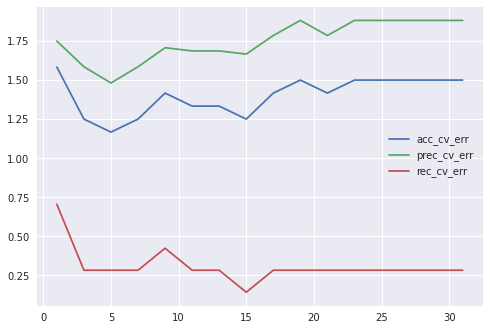

In [30]:
with plt.style.context('seaborn'):
    sns.lineplot(x=neighbors,y=acc_scr_cv_err,label='acc_cv_err')
    sns.lineplot(x=neighbors,y=prec_scr_cv_err,label='prec_cv_err')
    sns.lineplot(x=neighbors,y=rec_scr_cv_err,label='rec_cv_err')

#### **TEST set performance metrics**

In [31]:
knn_cancer_model = KNC(n_neighbors=neighbor,weights='distance',algorithm='kd_tree',leaf_size=50,p=3)
knn_cancer_model.fit(X_train,y_train)
knn_cancer_ypred = knn_cancer_model.predict(X_test)

In [32]:
accuracy_score(y_test,knn_cancer_ypred), precision_score(y_test,knn_cancer_ypred), recall_score(y_test,knn_cancer_ypred)

(0.9415204678362573, 0.9152542372881356, 1.0)

#### **Predicting Class Probability**

In [33]:
print(knn_cancer_model.predict_proba(X_test))

[[0.10727533 0.89272467]
 [1.         0.        ]
 [0.90987962 0.09012038]
 [0.01882241 0.98117759]
 [0.01403691 0.98596309]
 [1.         0.        ]
 [1.         0.        ]
 [0.96872456 0.03127544]
 [0.02335353 0.97664647]
 [0.12278102 0.87721898]
 [0.03116392 0.96883608]
 [0.98430656 0.01569344]
 [0.12262872 0.87737128]
 [0.57084654 0.42915346]
 [0.02223204 0.97776796]
 [1.         0.        ]
 [0.11867577 0.88132423]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.28898917 0.71101083]
 [0.0501302  0.9498698 ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.0243354  0.9756646 ]
 [0.02509231 0.97490769]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.01898134 0.98101866]
 [0.         1.        ]
 [0.19632132 0.80367868]
 [0.         1.        ]
 [0.01658878 0.98341122]
 [0.92674356 0.07325644]
 [0.03880247 0.96119753]
 [1.         0.        ]
 [0.15321879 0.84678121]


## **`Locality Sensitive Hashing`**

In [34]:
import numpy as np
    
class HashTable:
    def __init__(self, hash_size, inp_dimensions):
        self.hash_size = hash_size
        self.inp_dimensions = inp_dimensions
        self.hash_table = dict()
        self.projections = np.random.randn(self.hash_size, inp_dimensions)
        
    def generate_hash(self, inp_vector):
        bools = (np.dot(inp_vector, self.projections.T) > 0).astype('int')
        return ''.join(bools.astype('str'))

    def __setitem__(self, inp_vec, label):
        hash_value = self.generate_hash(inp_vec)
        self.hash_table[hash_value] = self.hash_table\
            .get(hash_value, list()) + [label]
        
    def __getitem__(self, inp_vec):
        hash_value = self.generate_hash(inp_vec)
        return self.hash_table.get(hash_value, [])
        
hash_table = HashTable(hash_size=4, inp_dimensions=20)

In [35]:
class LSH:
    def __init__(self, num_tables, hash_size, inp_dimensions):
        self.num_tables = num_tables
        self.hash_size = hash_size
        self.inp_dimensions = inp_dimensions
        self.hash_tables = list()
        for i in range(self.num_tables):
            self.hash_tables.append(HashTable(self.hash_size, self.inp_dimensions))
    
    def __setitem__(self, inp_vec, label):
        for table in self.hash_tables:
            table[inp_vec] = label
    
    def __getitem__(self, inp_vec):
        results = list()
        for table in self.hash_tables:
            results.extend(table[inp_vec])
        return list(set(results))